### Introduction
In this notebook, we are demonstrating the backtesting infrastructure for a trading strategy, focusing on the components of holding, cash, and the total value of the portfolio. Backtesting is a crucial process in developing and evaluating trading strategies, allowing traders and analysts to simulate how their strategies would have performed in the past using historical data. By combining these elements, we aim to provide a comprehensive view of the strategy's performance over time.
    

### Key Components

1. **Holdings**:
    - Represents the number of shares held in the portfolio.
    - The value of the holdings is calculated by multiplying the number of shares by the stock's closing price.

2. **Cash**:
    - Tracks the cash balance in the portfolio.
    - Cash increases when shares are sold and decreases when shares are bought.

3. **Total Portfolio Value**:
    - The sum of the cash and the value of the holdings.
    - Provides a holistic view of the portfolio's worth at any given point in time.
    

### Backtesting Process

1. **Data Download**:
   - We start by downloading historical stock data using the `yfinance` library. This data includes the stock's opening, closing, high, and low prices, along with the trading volume.

2. **Signal Generation**:
   - Buy and sell signals are generated based on a predefined strategy. These signals dictate when to buy or sell shares.

3. **Simulation of Trades**:
   - The strategy is simulated over the historical data, updating the cash and holdings based on the buy and sell signals.

4. **Tracking Portfolio Metrics**:
   - Throughout the simulation, we keep track of the cash, holdings, and total portfolio value.

5. **Performance Evaluation**:
   - At the end of the simulation, we evaluate the final portfolio value, cash balance, and holdings to understand the strategy's performance.
   - We also plot the changes in cash, holdings, and total portfolio value over time to visualize the strategy's dynamics.



### Example Scenario

In the provided example, we are backtesting a strategy on Tesla's stock (`TSLA`) from January 1, 2010, to December 31, 2023. The notebook includes the following steps:

1. **Downloading Data**:
   - We use `yfinance` to download Tesla's historical stock data for the specified date range.

2. **Defining the Strategy**:
   - A simple strategy is defined where buy and sell signals are generated randomly for demonstration purposes.

3. **Backtesting the Strategy**:
   - The strategy is backtested, updating the cash, holdings, and total portfolio value based on the signals.
   - The final portfolio value, cash, and holdings are printed.

4. **Visualizing Results**:
   - The cash, holdings, and total portfolio value are plotted over time to provide a visual representation of the strategy's performance.

This notebook serves as an educational tool to understand the basics of backtesting, portfolio management, and performance evaluation in the context of trading strategies.


In [1]:
import yfinance as yf
import pandas as pd

def download_data(symbol, start_date, end_date):
    """
    Download historical data from Yahoo Finance for a given symbol and date range.
    """
    df = yf.download(symbol, start=start_date, end=end_date)
    df.reset_index(inplace=True)
    return df

# Example usage:
symbol = 'TSLA'
start_date = '2010-01-01'
end_date = '2023-12-31'
tesla_data = download_data(symbol, start_date, end_date)

# Save the dataframe to a CSV file
tesla_data.to_csv('tesla_data.csv', index=False)


/var/folders/ch/_bz9vy1x62s6hb0snksmrqwm0000gn/T/ipykernel_71382/2159442094.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


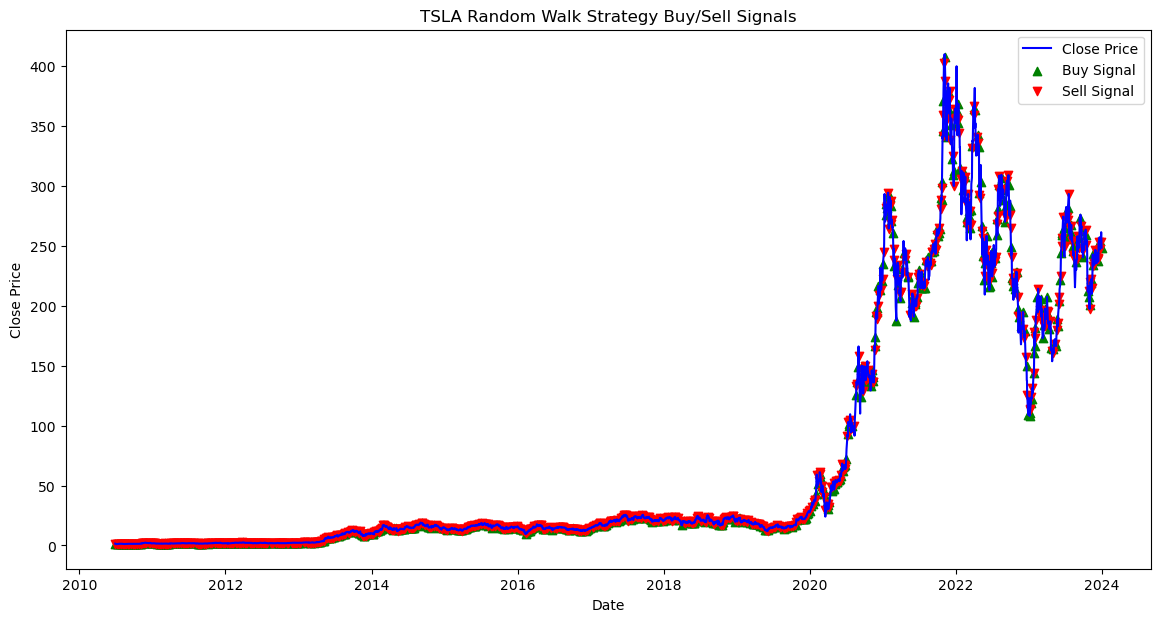

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def random_walk_strategy(df):
    """
    Implement a random walk strategy for buy/sell signals.
    """
    np.random.seed(42)  # For reproducibility
    buy_signals = []
    sell_signals = []
    
    position = None
    
    for i in range(len(df)):
        rand = np.random.rand()
        if rand > 0.5 and position != 'buy':
            buy_signals.append(i)
            position = 'buy'
        elif rand <= 0.5 and position != 'sell':
            sell_signals.append(i)
            position = 'sell'
    
    return buy_signals, sell_signals

# Get buy/sell signals
buy_signals, sell_signals = random_walk_strategy(tesla_data)

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(tesla_data['Date'], tesla_data['Close'], label='Close Price', color='blue')
plt.scatter(tesla_data['Date'].iloc[buy_signals], tesla_data['Close'].iloc[buy_signals], marker='^', color='green', label='Buy Signal', alpha=1)
plt.scatter(tesla_data['Date'].iloc[sell_signals], tesla_data['Close'].iloc[sell_signals], marker='v', color='red', label='Sell Signal', alpha=1)
plt.title(f'{symbol} Random Walk Strategy Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [3]:
# Backtest the strategy and track performance
def backtest_strategy(df, buy_signals, sell_signals, initial_cash=10000):
    cash = initial_cash
    holdings = 0
    portfolio_value = initial_cash
    
    cash_history = []
    holdings_history = []
    portfolio_value_history = []

    buy_prices = df['Close'].iloc[buy_signals]
    sell_prices = df['Close'].iloc[sell_signals]
    
    actions = sorted([(i, 'buy') for i in buy_signals] + [(i, 'sell') for i in sell_signals])
    
    for i in range(len(df)):
        if actions and i == actions[0][0]:
            _, action = actions.pop(0)
            if action == 'buy' and cash >= df['Close'].iloc[i]:
                shares_to_buy = cash // df['Close'].iloc[i]
                holdings += shares_to_buy
                cash -= shares_to_buy * df['Close'].iloc[i]
            elif action == 'sell' and holdings > 0:
                cash += holdings * df['Close'].iloc[i]
                holdings = 0
        
        portfolio_value = cash + (holdings * df['Close'].iloc[i])
        
        cash_history.append(cash)
        holdings_history.append(holdings * df['Close'].iloc[i])
        portfolio_value_history.append(portfolio_value)
    
    return portfolio_value, cash, holdings, cash_history, holdings_history, portfolio_value_history

# Backtest the strategy
final_portfolio_value, final_cash, final_holdings, cash_history, holdings_history, portfolio_value_history = backtest_strategy(tesla_data, buy_signals, sell_signals)

print(f"Final Portfolio Value: ${final_portfolio_value:.2f}")
print(f"Final Cash: ${final_cash:.2f}")
print(f"Final Holdings: {final_holdings} shares of {symbol}")

# Plot cash, holdings, and total portfolio value over time
plt.figure(figsize=(14, 7))
plt.plot(tesla_data['Date'], cash_history, label='Cash', color='blue')
plt.plot(tesla_data['Date'], holdings_history, label='Holdings', color='orange')
plt.plot(tesla_data['Date'], portfolio_value_history, label='Total Portfolio Value', color='green')
plt.title(f'{symbol} Random Walk Strategy Performance')
plt.xlabel('Date')
plt.ylabel('Value in $')
plt.legend()
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

[*********************100%%**********************]  1 of 1 completed


Final Portfolio Value: $80619.15
Final Cash: $80619.15
Final Holdings: 0 shares of AAPL
Portfolio value on day 65: $10959.53
Number of 'Buy' signals in the first 100 days: 50
Closing price of AAPL on the 50th day: $8.00
Cash balance on day 120: $4.81
First 'Sell' signal occurs on day: 1
Total number of 'Hold' signals: 0
Holdings value on the 100th day: $10568.31
Final cash balance at the end of the backtesting period: $80619.15
Number of shares held on the 200th day: 13053.845820426941
Portfolio value on the last day: $80619.15


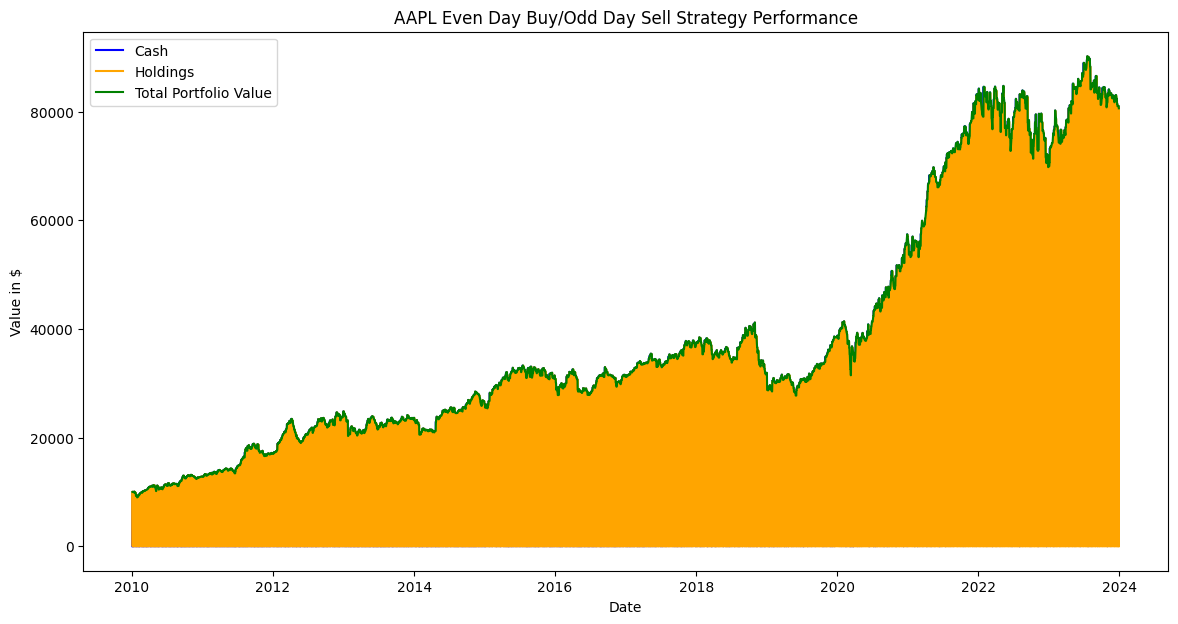

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to download data
def download_data(symbol, start_date, end_date):
    df = yf.download(symbol, start=start_date, end=end_date)
    df.reset_index(inplace=True)
    return df

# Download data for AAPL
symbol = 'AAPL'
start_date = '2010-01-01'
end_date = '2023-12-31'
aapl_data = download_data(symbol, start_date, end_date)

# Implementing the strategy: Buy on every even day, sell on every odd day
aapl_data['Signal'] = ['Buy' if i % 2 == 0 else 'Sell' for i in range(len(aapl_data))]

# Function to backtest the strategy
def backtest_strategy(df, initial_cash=10000):
    cash = initial_cash
    holdings = 0
    cash_history = []
    holdings_history = []
    portfolio_value_history = []

    for i in range(len(df)):
        if df['Signal'].iloc[i] == 'Buy':
            shares_to_buy = cash // df['Close'].iloc[i]
            cash -= shares_to_buy * df['Close'].iloc[i]
            holdings += shares_to_buy
        elif df['Signal'].iloc[i] == 'Sell':
            cash += holdings * df['Close'].iloc[i]
            holdings = 0

        portfolio_value = cash + holdings * df['Close'].iloc[i]
        cash_history.append(cash)
        holdings_history.append(holdings * df['Close'].iloc[i])
        portfolio_value_history.append(portfolio_value)

    return portfolio_value, cash, holdings, cash_history, holdings_history, portfolio_value_history

# Backtest the strategy
final_portfolio_value, final_cash, final_holdings, cash_history, holdings_history, portfolio_value_history = backtest_strategy(aapl_data)

# Print results
print(f"Final Portfolio Value: ${final_portfolio_value:.2f}")
print(f"Final Cash: ${final_cash:.2f}")
print(f"Final Holdings: {final_holdings} shares of {symbol}")

# Answers for the questions
print(f"Portfolio value on day 65: ${portfolio_value_history[65]:.2f}")
print(f"Number of 'Buy' signals in the first 100 days: {len(aapl_data['Signal'][:100][aapl_data['Signal'][:100] == 'Buy'])}")
print(f"Closing price of AAPL on the 50th day: ${aapl_data['Close'][50]:.2f}")
print(f"Cash balance on day 120: ${cash_history[120]:.2f}")
print(f"First 'Sell' signal occurs on day: {aapl_data[aapl_data['Signal'] == 'Sell'].index[0]}")
print(f"Total number of 'Hold' signals: {len(aapl_data[aapl_data['Signal'] == 'Hold'])}")
print(f"Holdings value on the 100th day: ${holdings_history[100]:.2f}")
print(f"Final cash balance at the end of the backtesting period: ${final_cash:.2f}")
print(f"Number of shares held on the 200th day: {holdings_history[200]}")
print(f"Portfolio value on the last day: ${final_portfolio_value:.2f}")

# Plot cash, holdings, and total portfolio value over time
plt.figure(figsize=(14, 7))
plt.plot(aapl_data['Date'], cash_history, label='Cash', color='blue')
plt.plot(aapl_data['Date'], holdings_history, label='Holdings', color='orange')
plt.plot(aapl_data['Date'], portfolio_value_history, label='Total Portfolio Value', color='green')
plt.title(f'{symbol} Even Day Buy/Odd Day Sell Strategy Performance')
plt.xlabel('Date')
plt.ylabel('Value in $')
plt.legend()
plt.show()
